# Домашнее задание по теме "Дисперсионный анализ и A/B-тесты"

Ниже представлено несколько блоков задач. Пожалуйста, выполните их в этом ноутбуке, загрузите в [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb?hl=ru) и предоставьте ссылку на него эксперту через Личный Кабинет.

In [7]:
 # Подгрузим пакеты 
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy. stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp

ModuleNotFoundError: No module named 'scikit_posthocs'

### Блок 1

##### Задание № 1
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.

In [33]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Напишите Ваш код для решения задачи

C:\Users\Johan.DESKTOP-53JNTRO.000\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Johan.DESKTOP-53JNTRO.000\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

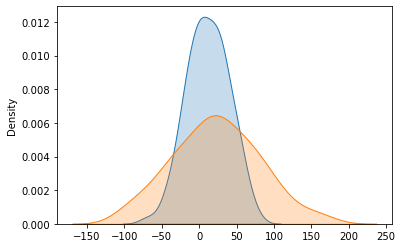

In [34]:
sns.distplot(A, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 1})
sns.distplot(B, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 1})

Значительное пересечение (наложение) площадей распределений и линии симметрий (средние) находятся рядом. Прихожу к выводу, что различия незначимы.

In [35]:
# Проведу t-критерий с двумя выборками

# Прежде чем мы проведем тест, нам нужно решить, будем ли мы предполагать,
# что две совокупности имеют одинаковую дисперсию или нет.
# Как правило, мы можем предположить, что совокупности имеют равные дисперсии,
# если отношение большей выборочной дисперсии к меньшей выборочной дисперсии
# составляет менее 4:1.

print(np.var(A), np.var(B))
# делим бОльшее значение на меньшее
np.var(B) / np.var(A)

783.52535368567 3356.463510695289


4.283796937656998

In [41]:
# отношение больше 4, значит воспользуюсь t-критерием Уэлча (equal_var=False)

stat, p = stats.ttest_ind(A, B, equal_var=False)
print(f'Статистика = {stat:.5f}, p = {p:.5f}')
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = -1.73380, p = 0.08511
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


#### pvalue > 0.05, следовательно, различия не значимые

### Визуализация с помощью boxplot

In [6]:
df_a = pd.DataFrame(A)
df_a.columns = ['A']

df_b = pd.DataFrame(B)
df_b.columns = ['B']

In [7]:
df_ab = pd.concat([df_a, df_b], axis=1)
# df_ab = df_a.join(df_b, how='outer')
df_ab

,A,B
0,63.483642,121.694372
1,2.417810,17.287024
2,-3.536954,-81.045742
3,-68.599557,-92.553899
4,10.751461,65.911018
...,...,...
95,19.148189,27.703331
96,36.760015,26.636666
97,-26.922210,66.925797
98,44.446109,46.579689


In [8]:
df_ab_melt = pd.melt(df_ab.reset_index(), id_vars=['index'], value_vars=['A', 'B'])
df_ab_melt.columns = ['index', 'treatments', 'value']
df_ab_melt

,index,treatments,value
0,0,A,63.483642
1,1,A,2.417810
2,2,A,-3.536954
3,3,A,-68.599557
4,4,A,10.751461
...,...,...,...
195,95,B,27.703331
196,96,B,26.636666
197,97,B,66.925797
198,98,B,46.579689


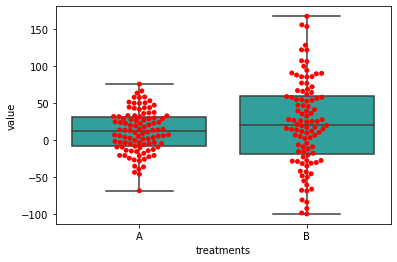

In [9]:
ax = sns.boxplot(x='treatments', y='value', data=df_ab_melt, color='#20B2AA')
ax = sns.swarmplot(x="treatments", y="value", data=df_ab_melt, color='#FF0000')
plt.show()

#### Boxplot- визуализация показала равенство средних, что подтверждает предыдущий вывод.

##### Задание № 2
Допустим, вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы — водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распределениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`

In [127]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral = [2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

# Напишите Ваш код для решения задачи

In [128]:
stat, p = f_oneway(nutri, mineral)
print(f'Статистика = {stat:.5f}, p = {p:.5f}')
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 18.12872, p = 0.00012
Отклоняем нулевую гипотезу, средние, вероятно, различаются


#### pvalue < 0.05, следовательно, различия между удобрением и минералкой значимые

In [129]:
f_oneway(water, nutri, mineral)

F_onewayResult(statistic=12.525963044834192, pvalue=2.9240047906326866e-05)

#### pvalue < 0.05, следовательно, различия между группами значимые
#### неясно, между кем отличия
#### визуализируем

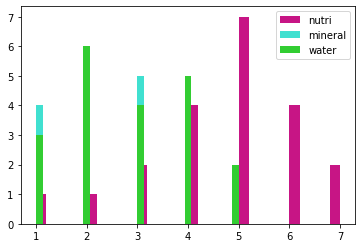

In [13]:
plt.hist(nutri, bins=30, color = '#C71585')
plt.hist(mineral, bins=30, color = '#40E0D0')
plt.hist(water, bins=30, color = '#32CD32')
plt.legend(['nutri', 'mineral', 'water'])

In [42]:
# минералка и вода друг друга перекрывают на графике
# различия незначимые

stat, p = f_oneway(water, mineral)
print(f'Статистика = {stat:.5f}, p = {p:.5f}')
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 0.01026, p = 0.91983
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


### Теперь визуализируем с помощью boxplot

In [15]:
data = [water] + [nutri] + [mineral]
data

[[1, 2, 3, 4, 2, 4, 2, 4, 5, 2, 3, 4, 2, 1, 3, 4, 3, 2, 5, 1],
 [1, 2, 4, 6, 5, 6, 7, 5, 4, 5, 6, 7, 4, 3, 5, 5, 6, 5, 4, 3, 5],
 [2, 1, 1, 3, 2, 4, 2, 4, 5, 4, 3, 2, 3, 2, 3, 1, 3, 4, 5, 1, 4]]

In [16]:
df = pd.DataFrame(data).transpose()
df.columns = ['water', 'nutri', 'mineral']
df.head()

,water,nutri,mineral
0,1.0,1.0,2.0
1,2.0,2.0,1.0
2,3.0,4.0,1.0
3,4.0,6.0,3.0
4,2.0,5.0,2.0


In [17]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['water', 'nutri', 'mineral'])
df_melt.columns = ['index', 'treatments', 'value']
df_melt

,index,treatments,value
0,0,water,1.0
1,1,water,2.0
2,2,water,3.0
3,3,water,4.0
4,4,water,2.0
...,...,...,...
58,16,mineral,3.0
59,17,mineral,4.0
60,18,mineral,5.0
61,19,mineral,1.0


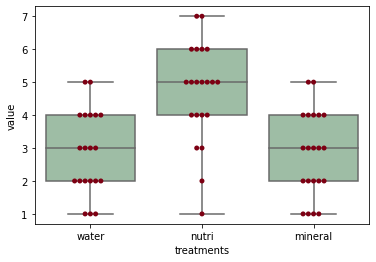

In [18]:
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

#### так получилось нагляднее:
    Между огурцами, поливаемыми водой и минералкой нет статистической разницы
    Огурцы, под удобрениями, отличаются 

### Блок 2
#### Cookie Cats

Cookie Cats — чрезвычайно популярная мобильная игра, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки.

По мере прохождения уровней игроки время от времени сталкиваются с воротами, которые заставляют их ждать или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота дают игрокам вынужденный перерыв в игре, что, как мы надеемся, приведёт к увеличению времени, проведённому в игре, и продлению удовольствия от игры.

<b>Но где ставить ворота? </b>
Изначально первые ворота были размещены на уровне `30`. В этом проекте вам предлагается проанализировать A/B-тест, в котором создатели переместили первые ворота в Cookie Cats с `30` уровня на уровень `40`. В частности, вам надо рассмотреть влияние A/B-теста на удержание игроков.

In [19]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения A/B-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.
* `version` - был ли игрок помещён в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).
* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - игрок вернулся и поиграл через 1 день после установки?
* `retention_7` - игрок вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

#### Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.
    
**Замечание:** приведённых вспомогательных фрагментов кода не хватает для ответа на вопрос. 

Делать выводы необходимо, опираясь на статистические тесты, разобранные в лекции. 

Большим плюсом будет построение визуализиции для подтверждения ваших выводов. Рекомендуем использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и `matplotlib`

In [20]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


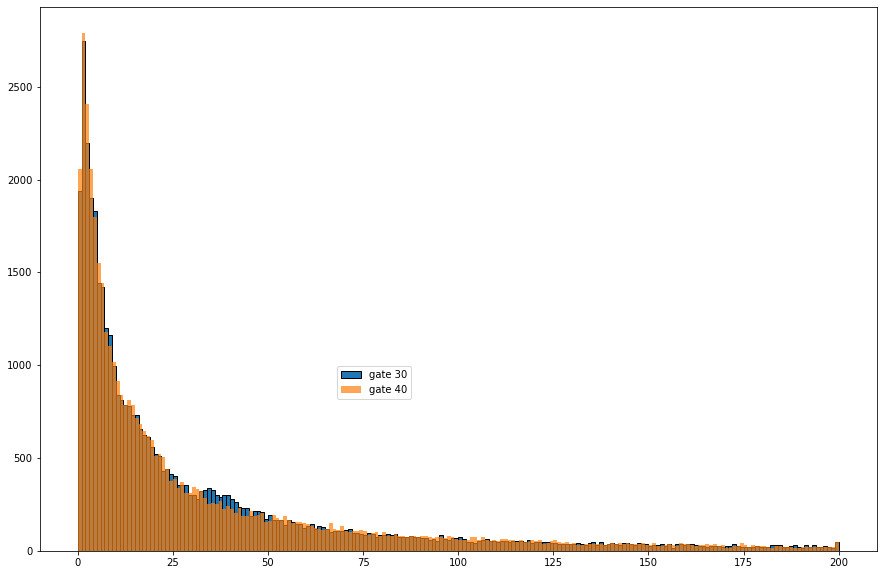

In [21]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

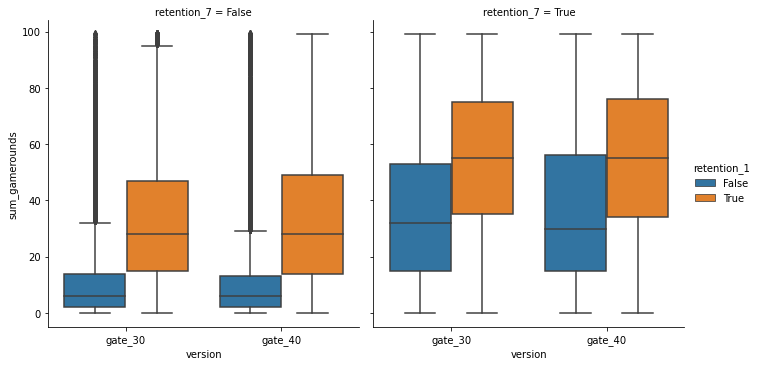

In [22]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

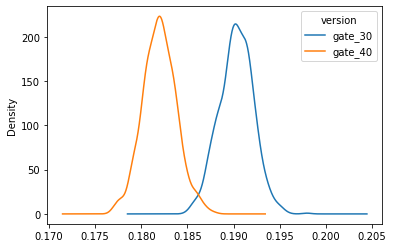

In [23]:
#Если вдруг оказалось сложно, то вот ещё один способ визуализации различий
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
boot_1d.plot(kind='density')

<span style="color:red">**ВОТ ТУТ ЯЧЕЙКА НИЖЕ - ЭТО, ПО СУТИ, РЕШЕНИЕ ЗАДАЧИ. УБРАТЬ БЫ ЕЁ ТОГДА**</span>

In [24]:
from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
print(f, 'pvalue = ',p)
stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

0.7939569526814368 pvalue =  0.3729086824696095
Statistics=1009027049.500, p=0.025


In [25]:
from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

# Напишите Ваш код для решения задачи

Равны ли дисперсии?

In [28]:
def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
#     p_value = scipy.stats.f.cdf(f, nun, dun)
    p_value = 1-stats.f.cdf(f, nun, dun)
    return f, p_value

In [30]:
stat, p = f_test(boot_1d['gate_30'], boot_1d['gate_40'])

print('Статистика=%.3f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперсии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперсии, вероятно, различаются')

Статистика=1.029, p=0.32437
Не отклоняем нулевую гипотезу, дисперсии, вероятно, одинаковые


In [32]:
stat, p = stats.ttest_ind(boot_1d['gate_30'], boot_1d['gate_40'])
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=101.435, p=0.0000000000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


Ниже, пожалуйста, напишите Ваши выводы на основании решения:

Значение p стремится к нулю, средние значения двух выборок неодинаковы. На boxplot выглядят, наоборот равными, возможноб слишком малый масштаб графика. Существует статистически значимая разница где ставить "ворота".

На графике видно, что группа gate_30 после того как получает ворота, становится более заинтересованной в игре, о чем свидетельствует рост пройденных уровней. В группе gate_40 я возрастания количества уровней после ворот не заметил. Считаю, что лучше отработали ворота на 30-м уровне

### Блок 3
#### Покемоны и A/B-тестирование

Покемоны — это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.).

Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

**Описание набора данных**
Профессор Оук скопировал всё содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

**Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается, что они имеют одинаковую значимость.**

In [10]:
# Откроем датасет

pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [11]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        800 non-null    int64 
 1   Name       799 non-null    object
 2   Class 1    800 non-null    object
 3   Class 2    414 non-null    object
 4   HP         800 non-null    int64 
 5   Attack     800 non-null    int64 
 6   Defense    800 non-null    int64 
 7   Sp. Atk    800 non-null    int64 
 8   Sp. Def    800 non-null    int64 
 9   Speed      800 non-null    int64 
 10  Legendary  800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


In [12]:
pokemon.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


**Задание № 1**
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем покемоны в классе `rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание: 
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [46]:
grass = pokemon[((pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] != 'Rock')) 
                | ((pokemon['Class 2'] == 'Grass') & (pokemon['Class 1'] != 'Rock'))]
grass

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
48,49,Oddish,Grass,Poison,45,50,55,75,65,30,False
...,...,...,...,...,...,...,...,...,...,...,...
783,784,Pumpkaboo Super Size,Ghost,Grass,59,66,70,44,55,41,False
784,785,Gourgeist Average Size,Ghost,Grass,65,90,122,58,75,84,False
785,786,Gourgeist Small Size,Ghost,Grass,55,85,122,58,75,99,False
786,787,Gourgeist Large Size,Ghost,Grass,75,95,122,58,75,69,False


In [47]:
rock = pokemon[((pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] != 'Grass')) 
                | ((pokemon['Class 2'] == 'Rock') & (pokemon['Class 1'] != 'Grass'))]
rock

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
80,81,Geodude,Rock,Ground,40,80,100,30,30,20,False
81,82,Graveler,Rock,Ground,55,95,115,45,45,35,False
82,83,Golem,Rock,Ground,80,120,130,55,65,45,False
103,104,Onix,Rock,Ground,35,45,160,30,45,70,False
119,120,Rhyhorn,Ground,Rock,80,85,95,30,30,25,False
120,121,Rhydon,Ground,Rock,105,130,120,45,45,40,False
149,150,Omanyte,Rock,Water,35,40,100,90,55,35,False
150,151,Omastar,Rock,Water,70,60,125,115,70,55,False
151,152,Kabuto,Rock,Water,30,80,90,55,45,55,False
152,153,Kabutops,Rock,Water,60,115,105,65,70,80,False


In [49]:
stat, p = stats.ttest_ind(grass['Attack'], rock['Attack'])
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=-3.729, p=0.0002733338
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [50]:
print(grass['Attack'].mean(), rock['Attack'].mean())

73.73118279569893 91.78571428571429


#### Средние показатели атаки у покемонов класса Rock выше, чем у Grass

**Задание № 2**
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос: а правда ли, что покемоны в классе `Water` в среднем быстрее покемонов в классе `Normal`. 

Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: 
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [51]:
water = pokemon[((pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] != 'Normal')) 
                | ((pokemon['Class 2'] == 'Water') & (pokemon['Class 1'] != 'Normal'))]
water

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,False
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,False
12,13,Mega Blastoise,Water,NaN,79,103,120,135,115,78,False
59,60,Psyduck,Water,NaN,50,52,48,65,50,55,False
...,...,...,...,...,...,...,...,...,...,...,...
759,760,Barbaracle,Rock,Water,72,105,115,54,86,68,False
760,761,Skrelp,Poison,Water,50,60,60,60,60,30,False
762,763,Clauncher,Water,NaN,50,53,62,58,63,44,False
763,764,Clawitzer,Water,NaN,71,73,88,120,89,59,False


In [52]:
normal = pokemon[((pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] != 'Water')) 
                | ((pokemon['Class 2'] == 'Normal') & (pokemon['Class 1'] != 'Water'))]
normal

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
20,21,Pidgey,Normal,Flying,40,45,40,35,35,56,False
21,22,Pidgeotto,Normal,Flying,63,60,55,50,50,71,False
22,23,Pidgeot,Normal,Flying,83,80,75,70,70,101,False
23,24,Mega Pidgeot,Normal,Flying,83,80,80,135,80,121,False
24,25,Rattata,Normal,NaN,30,56,35,25,35,72,False
...,...,...,...,...,...,...,...,...,...,...,...
735,736,Litleo,Fire,Normal,62,50,58,73,54,72,False
736,737,Pyroar,Fire,Normal,86,68,72,109,66,106,False
744,745,Furfrou,Normal,NaN,75,80,60,65,90,102,False
764,765,Helioptile,Electric,Normal,44,38,33,61,43,70,False


In [53]:
stat, p = stats.ttest_ind(water['Speed'], normal['Speed'])
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=-2.151, p=0.0325535355
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [54]:
print(water['Speed'].mean(), normal['Speed'].mean())

64.936 72.25742574257426


#### покемоны класса Normal,в среднем, быстрее чем класса Water

**Задание № 3:**
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. 
Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку некоторым покемонам (массив `treathed_pokemon`). 
Проверьте, работает ли вообще его сыворотка, и убедите всех в своем выводе статистически.
    
    
*Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.*

In [55]:
# Покемоны, которые принимали сыворотку
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [56]:
treathed = pokemon[pokemon['Name'].isin(treathed_pokemon)]
treathed

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [57]:
not_treathed = pokemon[~pokemon['Name'].isin(treathed_pokemon)]
not_treathed.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [59]:
stat, p = stats.ttest_ind(not_treathed['Speed'], treathed['Speed'])
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=-5.385, p=0.0000000952
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [60]:
print(not_treathed['Speed'].mean(), treathed['Speed'].mean())

67.89195979899498 145.0


#### Очень маленькая выборка ускоренных покемонов. Возможно, достаточно было обойтись сравнением средних значений 
#### Эффект от сыворотки есть, различия по скорости значимые, это видно и по средним значениям

**Задание № 4**
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. 
Оук предложил разобраться в этом Вам. 

Действительно ли сумма характеристик `HP`, `Attack`, `Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров? 

Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [61]:
legend = pokemon[pokemon['Legendary']]
legend

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
156,157,Articuno,Ice,Flying,90,85,100,95,125,85,True
157,158,Zapdos,Electric,Flying,90,90,85,125,90,100,True
158,159,Moltres,Fire,Flying,90,100,90,125,85,90,True
162,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


In [62]:
not_legend = pokemon[~pokemon['Legendary']]
not_legend

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
787,788,Gourgeist Super Size,Ghost,Grass,85,100,122,58,75,54,False
788,789,Bergmite,Ice,NaN,55,69,85,32,35,28,False
789,790,Avalugg,Ice,NaN,95,117,184,44,46,28,False
790,791,Noibat,Flying,Dragon,40,30,35,45,40,55,False


In [63]:
stat, p = stats.ttest_ind(legend['HP'] + legend['Attack'] + legend['Defense'], 
                not_legend['HP'] + not_legend['Attack'] + not_legend['Defense'])
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, суммы характеристик, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, суммы характеристик, вероятно, различаются')

Статистика=11.592, p=0.0000000000
Отклоняем нулевую гипотезу, суммы характеристик, вероятно, различаются


In [64]:
stat, p = stats.ttest_ind(legend['HP'] * legend['Attack'] * legend['Defense'], 
                not_legend['HP'] * not_legend['Attack'] * not_legend['Defense'])
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, произведения характеристик, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, произведения характеристик, вероятно, различаются')

Статистика=13.263, p=0.0000000000
Отклоняем нулевую гипотезу, произведения характеристик, вероятно, различаются


#### суммы и произведения характеристик HP, Attack, Defense у легендарных покемонов выше, чем у других покемонов

**Задание № 5**
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса (массив `best_defence_class`), которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. 

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо. Все та же статистика Вам в помощь! 

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [13]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']

In [14]:
best_defence = pokemon[(pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')
                     | (pokemon['Class 1'] == 'Ground') | (pokemon['Class 2'] == 'Ground')
                     | (pokemon['Class 1'] == 'Steel') | (pokemon['Class 2'] == 'Steel')
                     | (pokemon['Class 1'] == 'Ice') | (pokemon['Class 2'] == 'Ice')]
best_defence.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,439.052910,70.814815,90.507937,95.666667,69.285714,75.275132,59.624339
std,211.696761,22.797503,32.911328,38.516092,31.247346,30.152070,27.638080
min,33.000000,10.000000,10.000000,15.000000,10.000000,25.000000,5.000000
25%,266.000000,55.000000,65.000000,70.000000,45.000000,50.000000,40.000000
50%,428.000000,70.000000,85.000000,90.000000,65.000000,72.000000,55.000000
75%,626.000000,89.000000,112.000000,115.000000,85.000000,90.000000,76.000000
max,797.000000,130.000000,180.000000,230.000000,170.000000,230.000000,150.000000


In [20]:
fvalue, pvalue = stats.f_oneway(pokemon[pokemon['Class 1'] == 'Rock']['Defense'] 
                                | pokemon[pokemon['Class 2'] == 'Rock']['Defense'], 
                                pokemon[pokemon['Class 1'] == 'Ground']['Defense'] 
                                | pokemon[pokemon['Class 2'] == 'Ground']['Defense'], 
                                pokemon[pokemon['Class 1'] == 'Steel']['Defense'] 
                                | pokemon[pokemon['Class 2'] == 'Steel']['Defense'], 
                                pokemon[pokemon['Class 1'] == 'Ice']['Defense'] 
                                | pokemon[pokemon['Class 2'] == 'Ice']['Defense'])

print('Статистика=%.3f, pvalue=%.10f' % (fvalue, pvalue))

if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=3.758, pvalue=0.0116949128
Отклоняем нулевую гипотезу, средние, вероятно, различаются


Покемоны указанных классов отличаются друг от друга по уровню защиты